# Load data and model

In [11]:
#Load libraries:
library(ggplot2)
library("here")
library("rethinking")
library("bayesplot")
library(viridis)
library(RColorBrewer)
library(corrplot)

In [7]:
m<-readRDS(here("extra_variables","m.archaeology_extra_variables.rds"))

In [12]:
posterior <- as.matrix(m) # Get posterior predictions for plots
bayesplot_theme_set(new = theme_classic()) # Set theme for bayesplot

In [13]:
mname<-"m.archaeology_extra_variables"

In [17]:
# Set output directories:
path2trankplot<-here("extra_variables",paste(mname,"trankplot.pdf",sep="_"))
path2traceplot<-here("extra_variables",paste(mname,"traceplot.png",sep="_"))
path2posteriorInt<-here("extra_variables",paste(mname,"posteriorInt.png",sep="_"))
path2posteriorIntUsers<-here("extra_variables",paste(mname,"posteriorIntUsers.png",sep="_"))
path2posterior<-here("extra_variables",paste(mname,"posterior.png",sep="_"))

## Model specification ##
$$R_i \sim ZIPoisson(p_i, λ_i)$$

$$logit(p_i) = α_p + β_p*F_i$$ 

$$α_p \sim Normal(-1.5,1)$$ 

$$β_p \sim Normal(0,0.5)$$


$$log(λ_i) = α\_topic[topic] + α\_user[user] +α\_url[url]+ α\_img[img]+ β_C*C_i +β_F*F_i + β_S*S_i + β_{TL}*\sum_{j=0}^{TL_i -1} \delta_j$$


$$ α\_topic \sim Normal(\widehat{\alpha},σ_T) $$ 
$$ α\_user \sim Normal(0,σ_U) $$ 
$$ α\_url \sim Normal(0,σ_U) $$ 
$$ α\_img \sim Normal(0,σ_U) $$ 


$$ \widehat{\alpha} \sim Normal (3,1)$$

$$ σ_T,σ_U \sim Cauchy(1,0.5) $$

$$β_F, β_S, β_T, β_C \sim Normal(0,0.2)$$

$$ \sim \gamma ~ Dirichlet([2,2,2,2])$$


# Model diagnostics

The table belowe shows parameters estimates together with Rhat value and the number of effective samples. All the Rhat value are close to 1, as they should be.

In [14]:
precis(m,depth=2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
alpha_topic[1],1.465692118,0.3972518892,0.890573630,2.083075950,377.7964,1.0123836
alpha_topic[2],1.645780964,0.3973375485,1.071921850,2.262550150,377.7137,1.0124055
alpha_topic[3],1.830479621,0.3973463440,1.257390850,2.448700550,377.3094,1.0124164
alpha_topic[4],3.023353258,0.3972900088,2.450482250,3.642000550,377.6390,1.0123950
alpha_topic[5],1.278054795,0.3972851114,0.704208545,1.895161550,377.6296,1.0124380
alpha_topic[6],1.576070968,0.3972576285,1.002749650,2.192950200,378.0286,1.0123501
alpha_topic[7],1.457931784,0.3973425727,0.886690890,2.077312200,377.8328,1.0123521
alpha_topic[8],1.962866567,0.3973029497,1.390412500,2.580921800,377.9970,1.0123705
alpha_topic[9],2.582721172,0.3973708883,2.008740100,3.201799800,377.6964,1.0123966


In addition to that, the trankplots and traceplots shown below show healthy chains which mixed well.

Waiting to draw page 2 of 3

Waiting to draw page 3 of 3



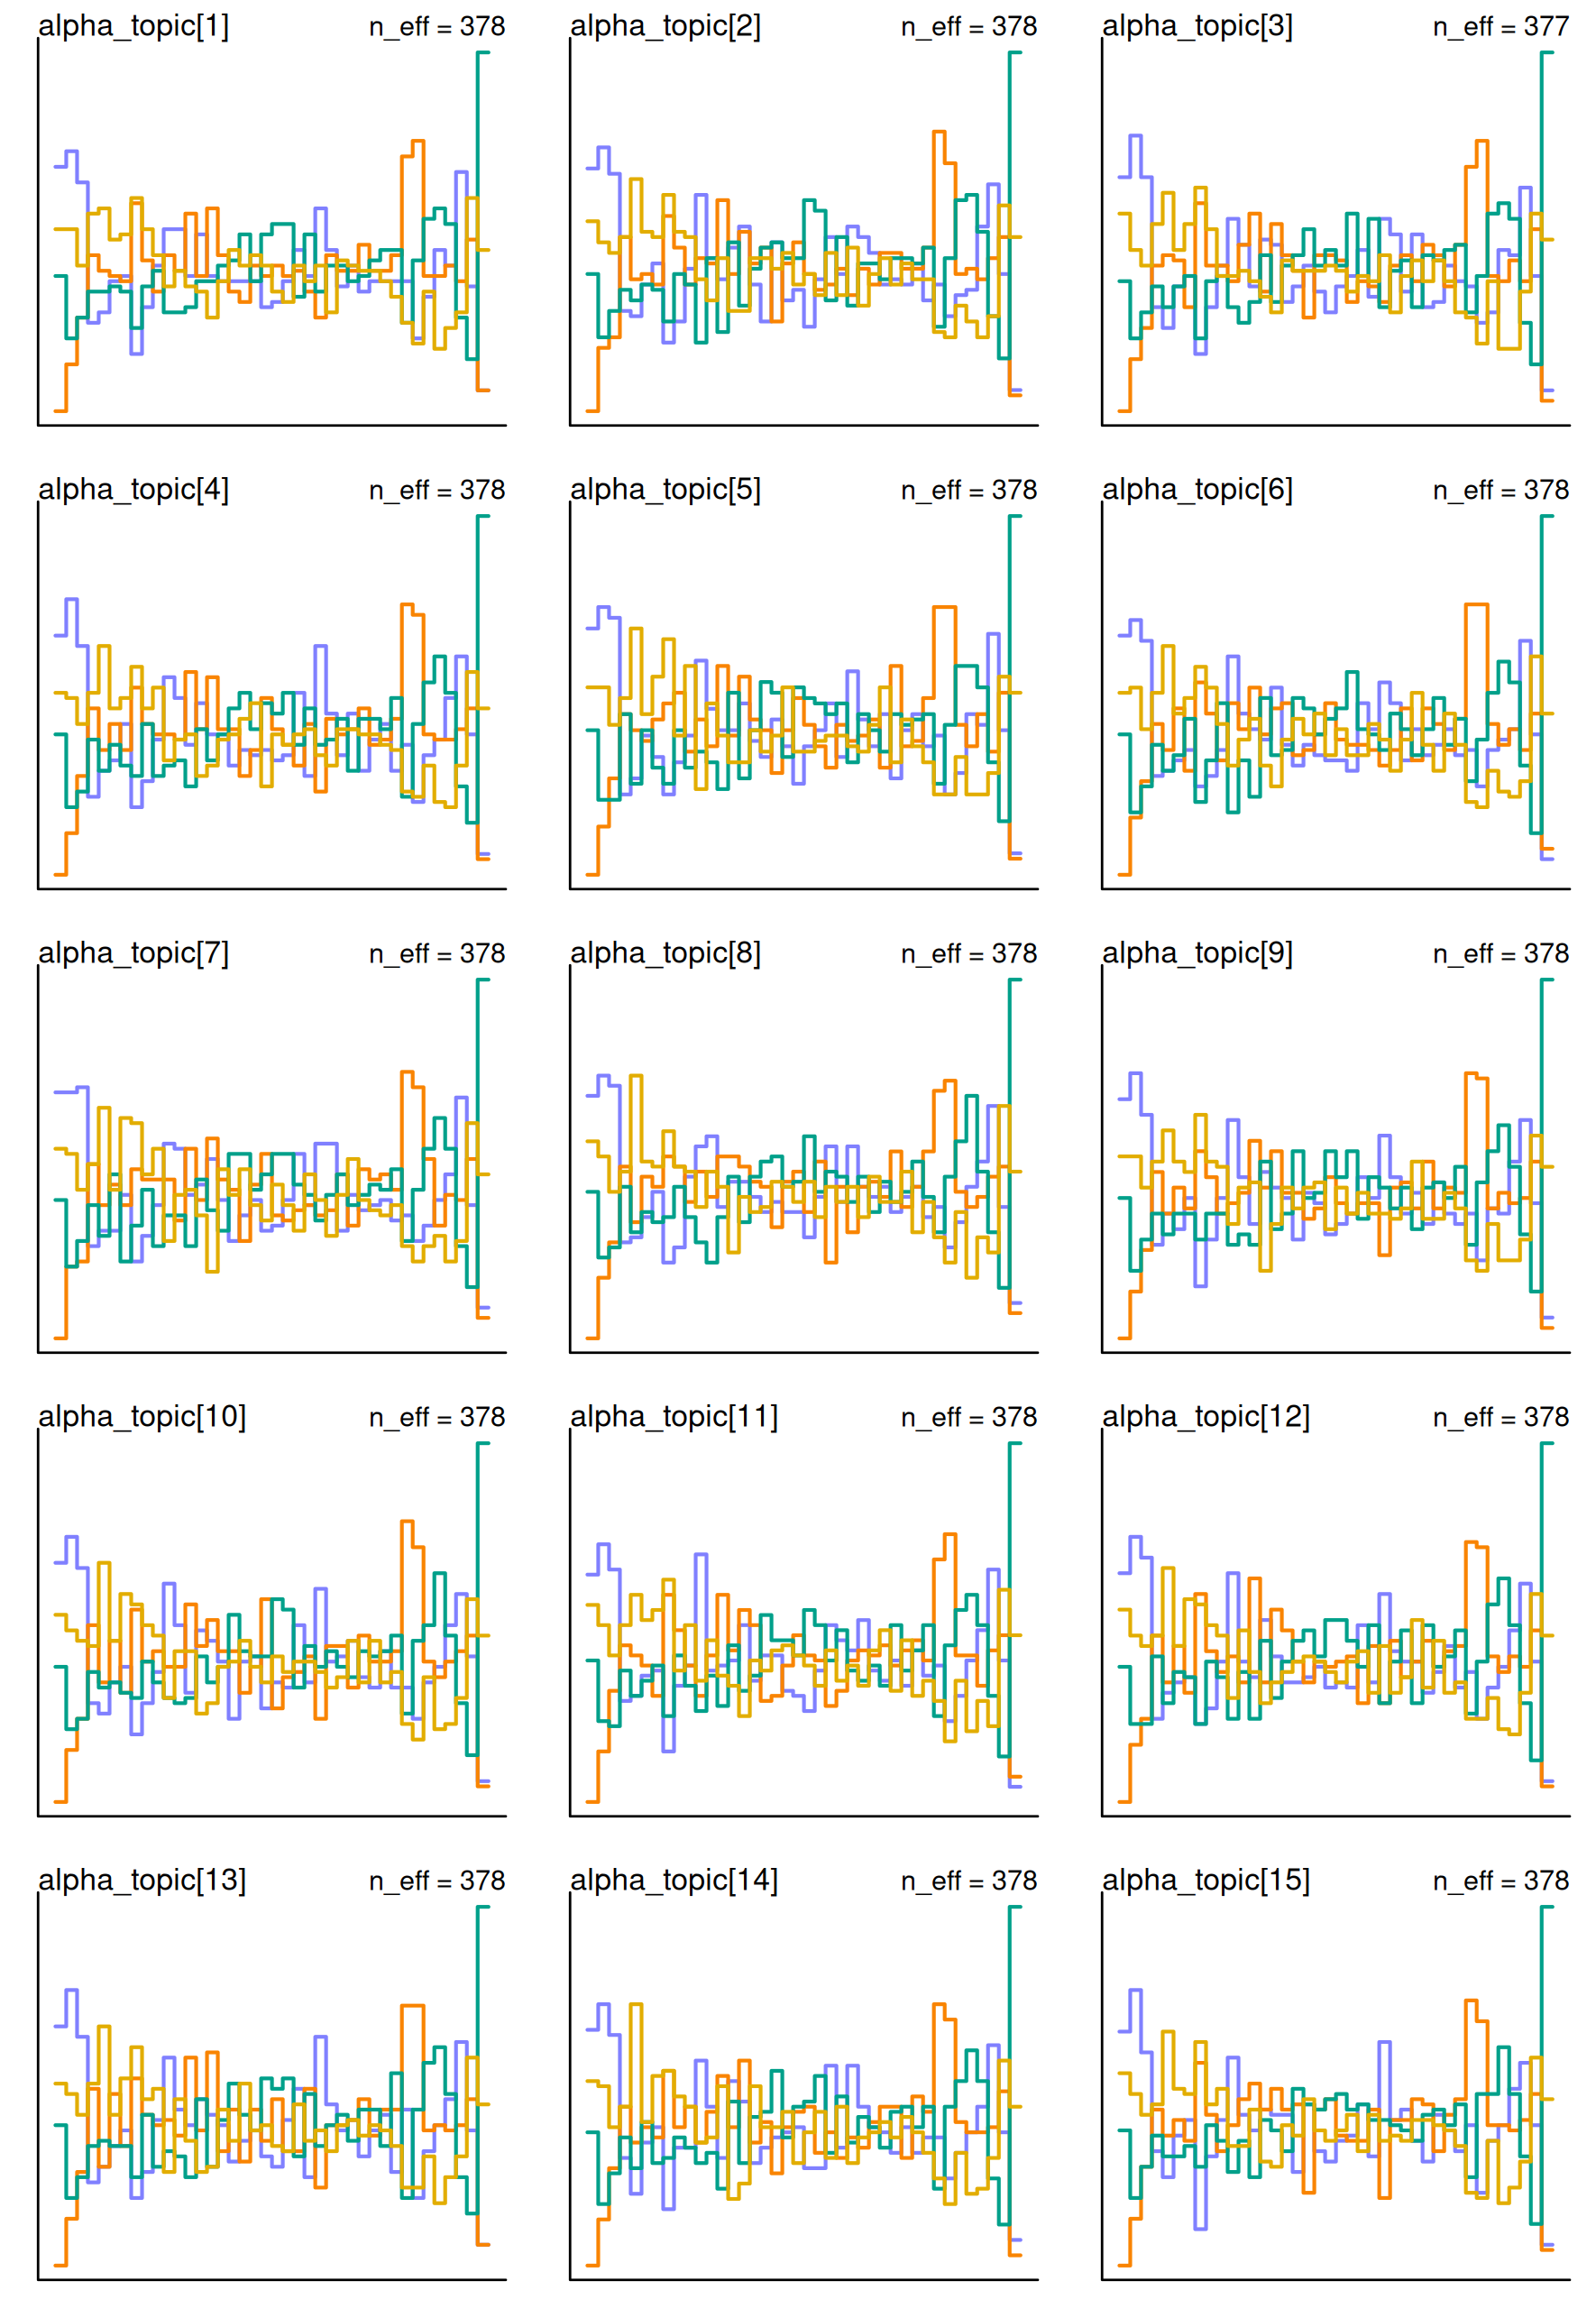

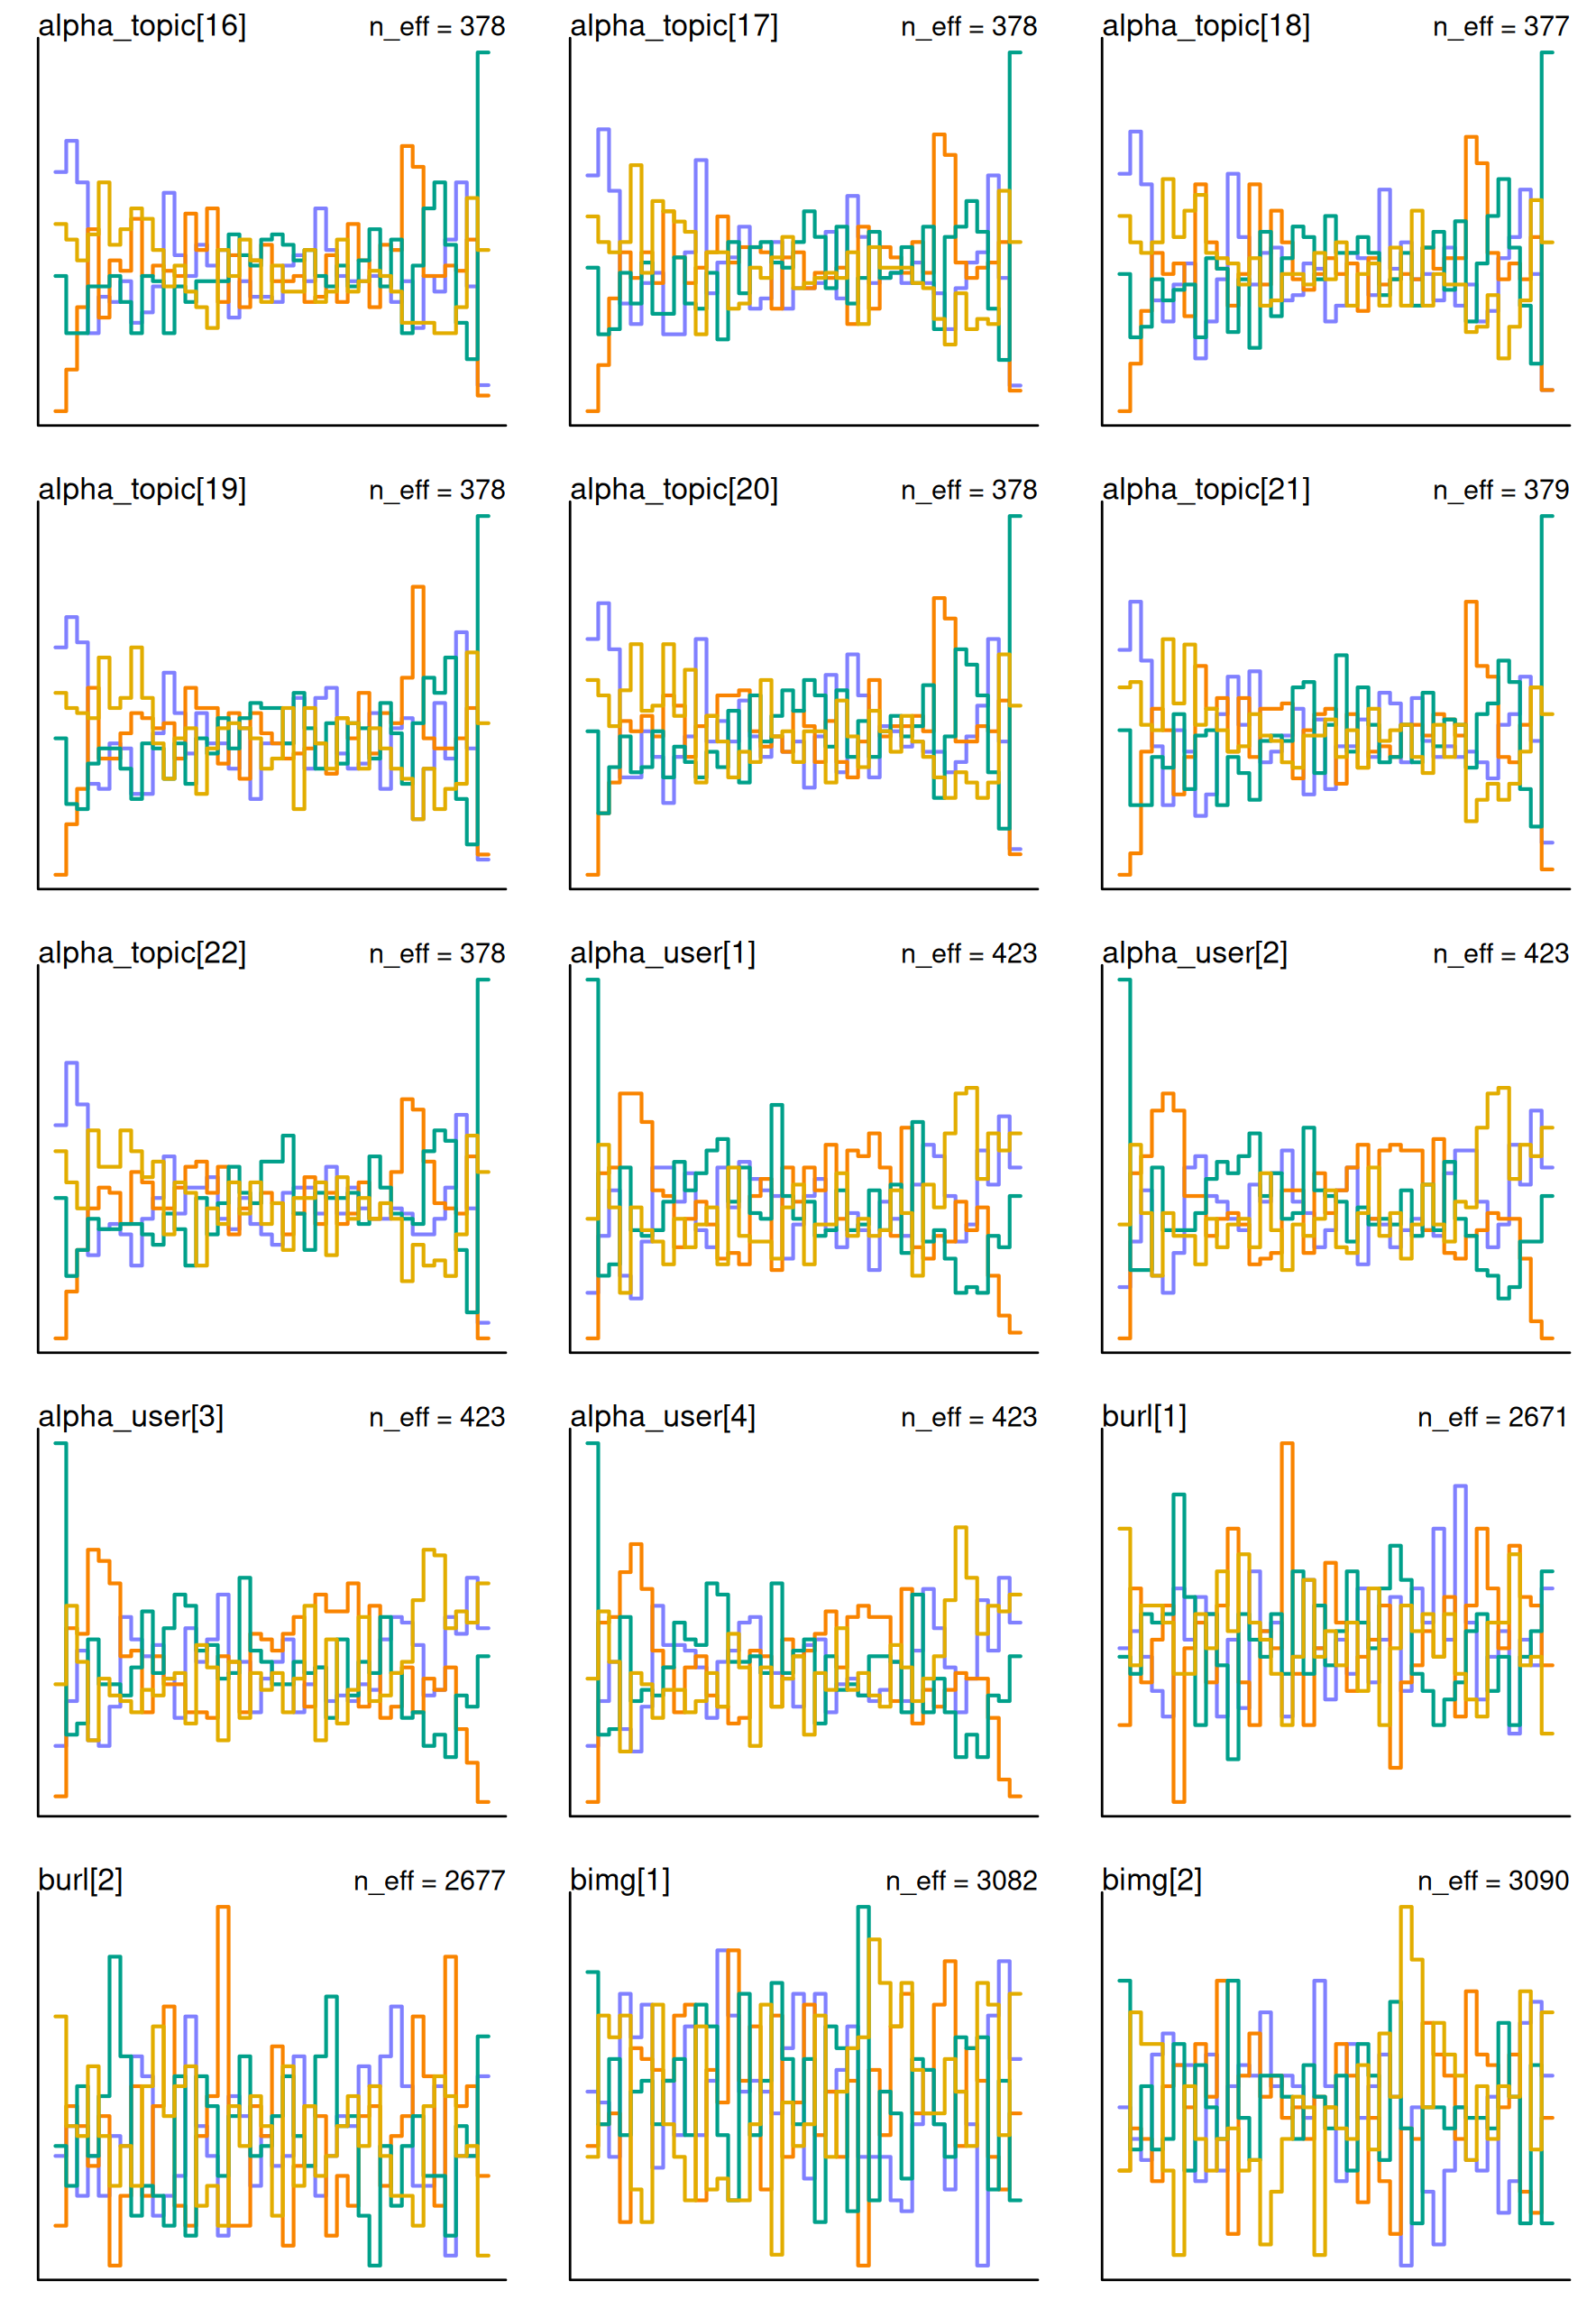

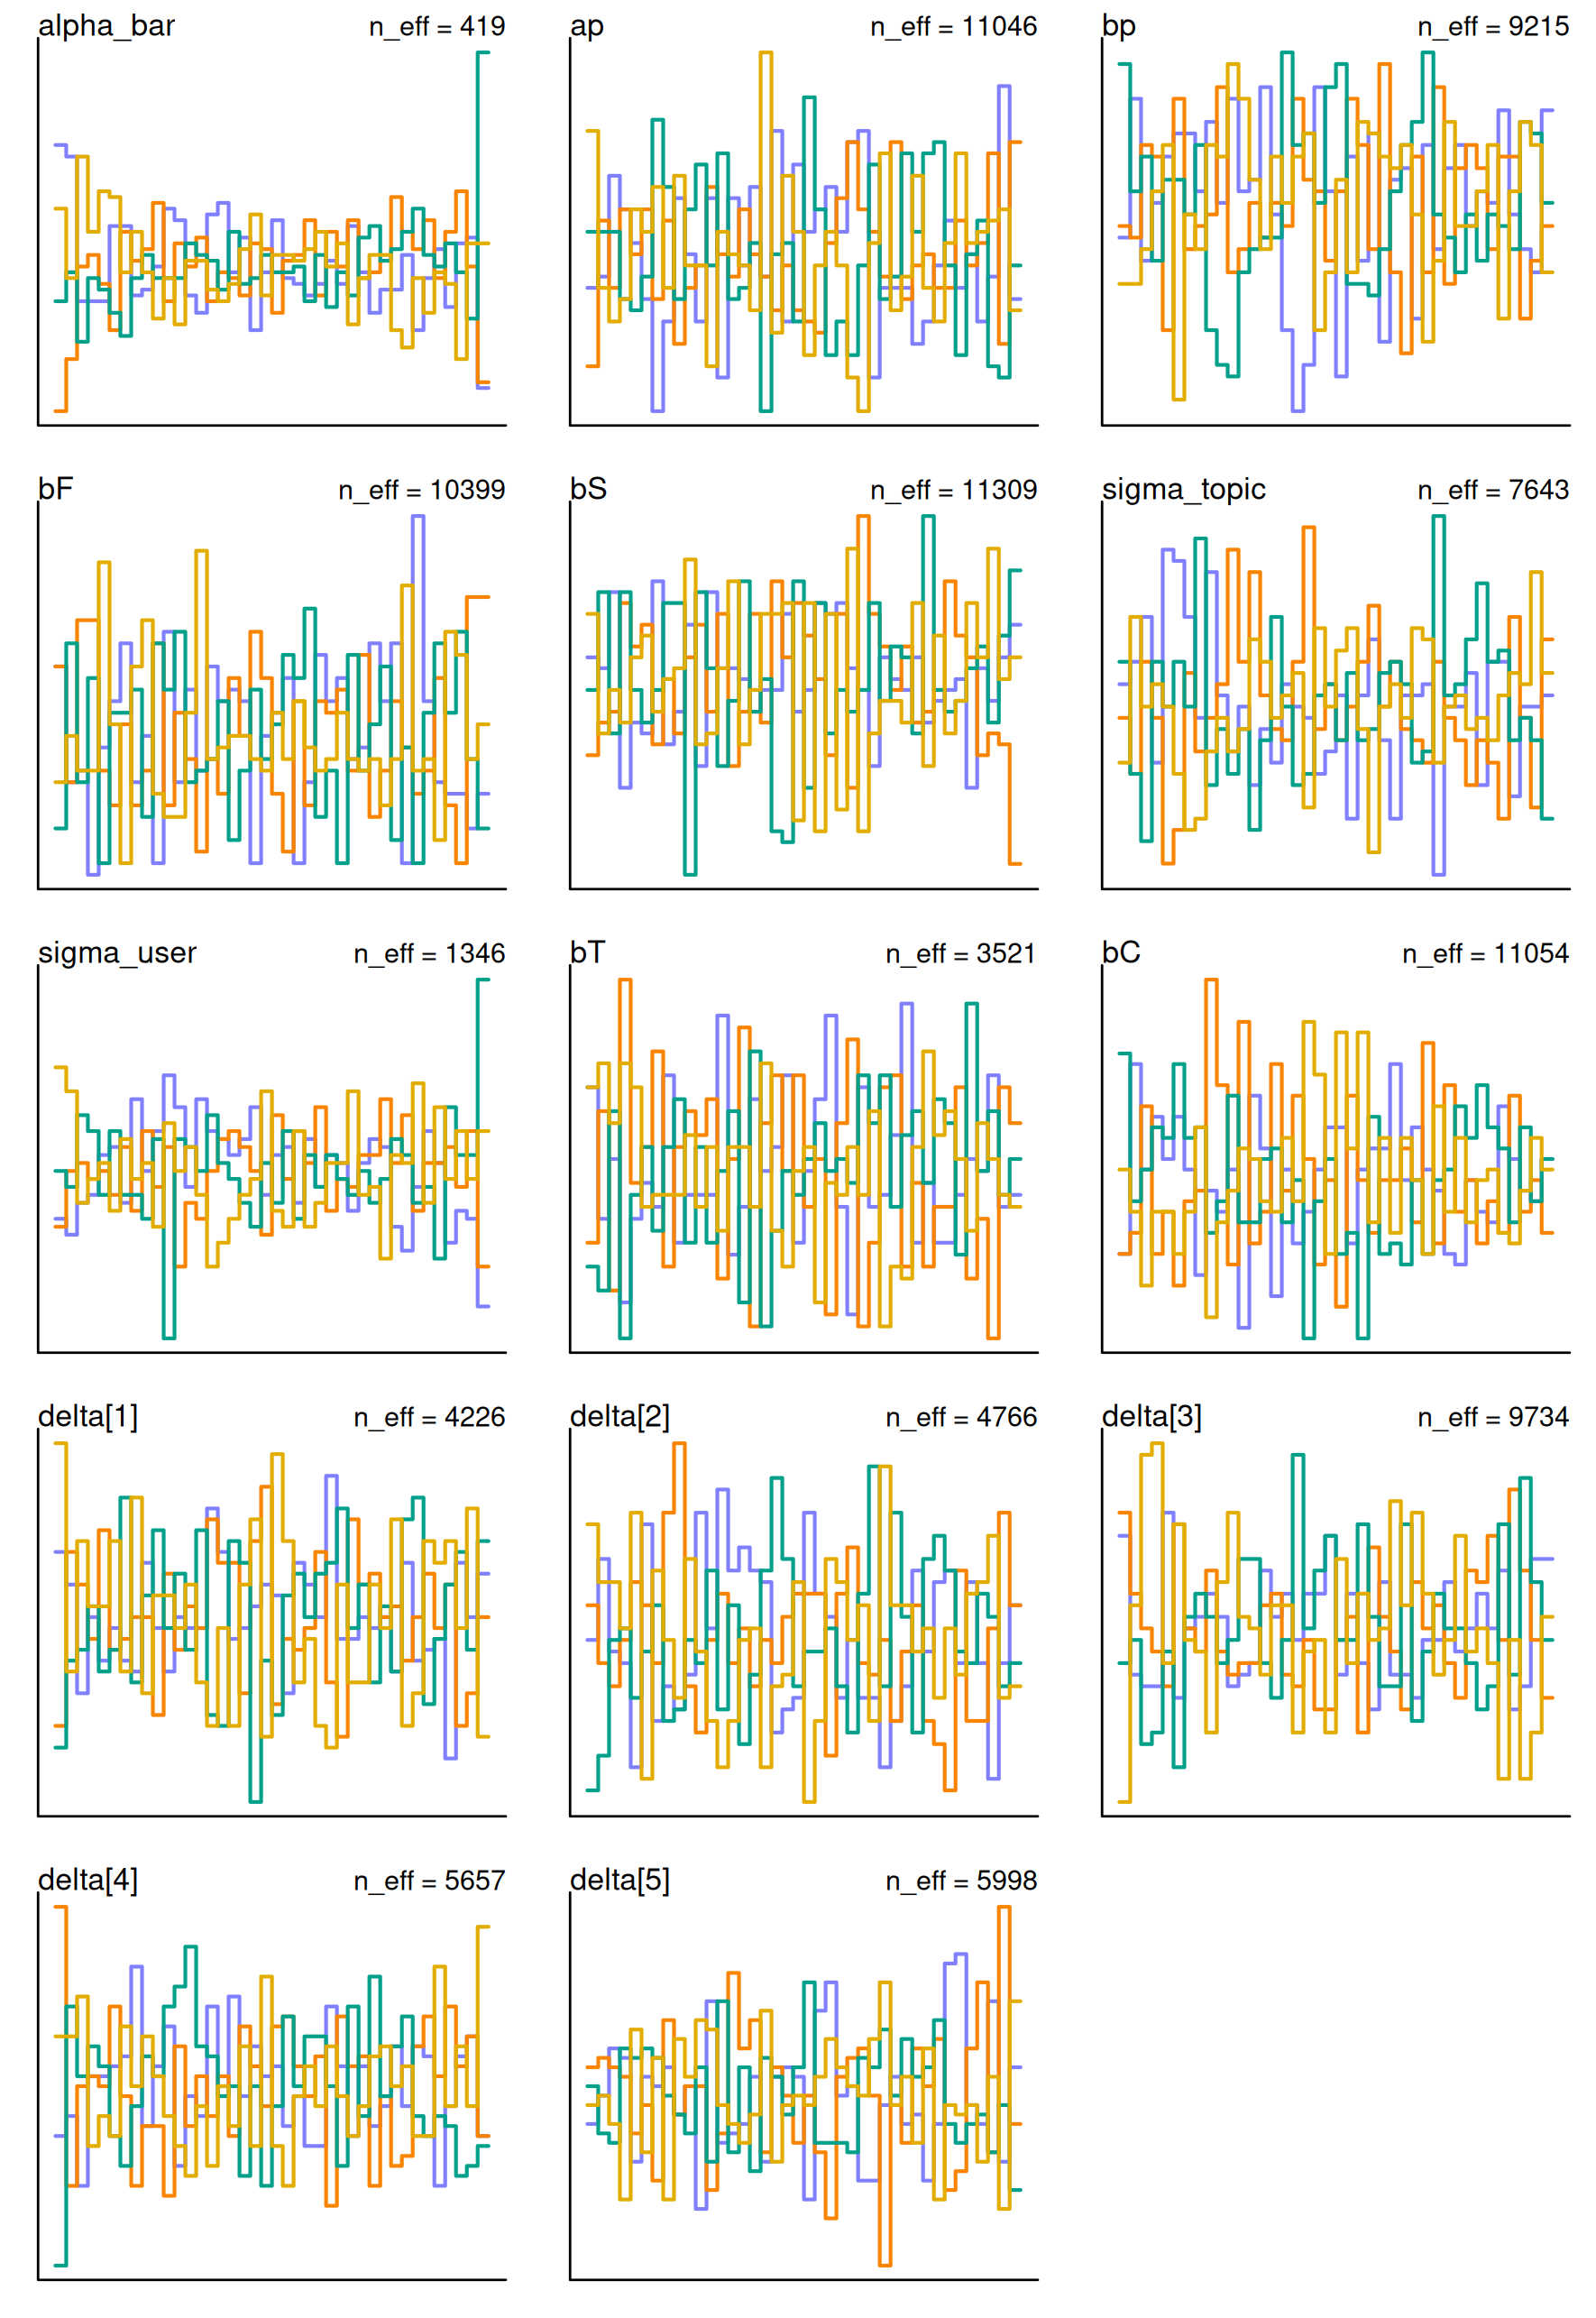

In [20]:
#pdf(path2trankplot,width = 17, height = 29) 
options(repr.plot.width=8.85,repr.plot.height=12.85,repr.plot.res=200)
trankplot(m)
#dev.off()

In [21]:
color_scheme_set("blue") 

In [22]:
posterior2 <- extract(m, inc_warmup = TRUE, permuted = FALSE)

In [23]:

p <- mcmc_trace(posterior2, n_warmup = 2500)+facet_text(size = 5)+theme( strip.background = element_blank(),axis.text.x = element_text(size=5) )

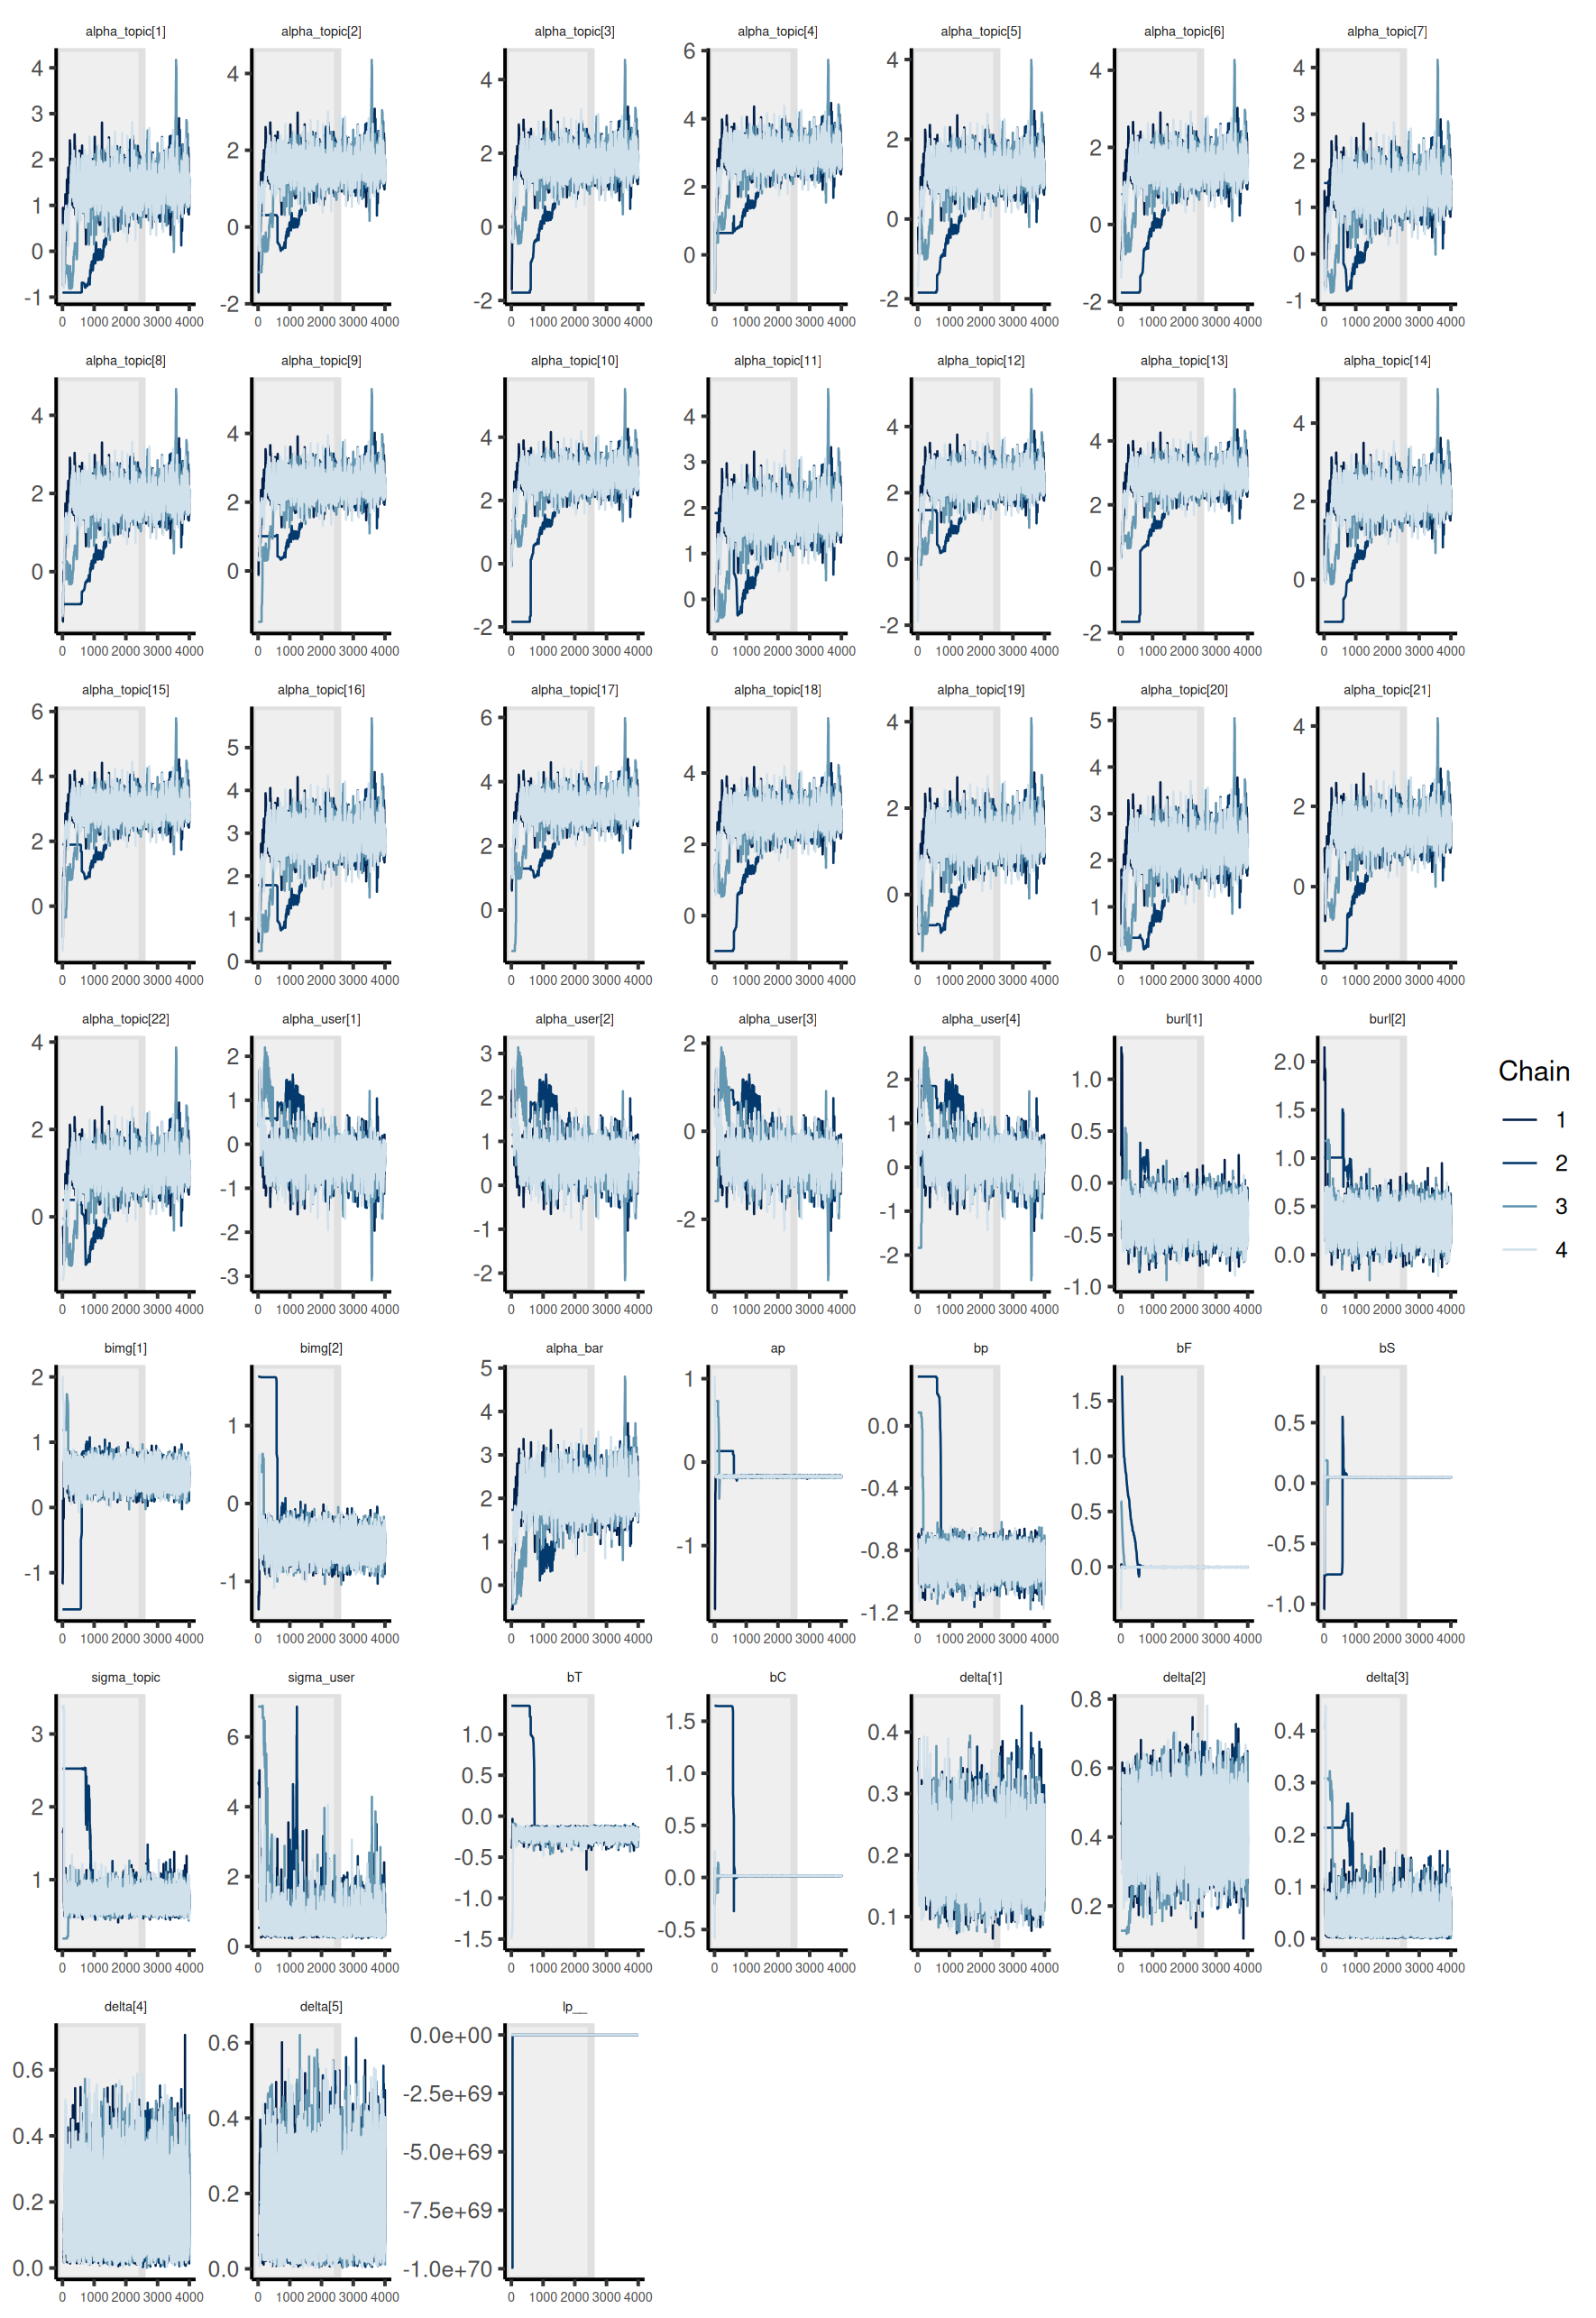

In [24]:
p

In [25]:
ggsave(path2traceplot,p,width = 29, height = 29,unit="cm",create.dir=TRUE)

# Interpretation

### Topics

In [26]:
tab<-precis(m,depth=2,pars="alpha_topic")

In [27]:
labels<-read.csv(here("outputs","TopicModels","tweets","Topics - Tweets.csv")) # Load topic labels

In [28]:
table<-cbind(labels[,colnames(labels)%in%c("Consolidated","X")],tab)

In [29]:
df<- table[order(table$mean,decreasing=TRUE),]

In [30]:
df

,X,Consolidated,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
alpha_topic[17],17,Discoveries of 'oldest' material remains,3.270248,0.3973704,2.6970934,3.889087,377.5872,1.012385
alpha_topic[15],15,Prehistoric cultures and technology,3.088086,0.3973436,2.5145285,3.706161,377.7076,1.012377
alpha_topic[4],4,Greek and Roman archaeology,3.023353,0.3972900,2.4504822,3.642001,377.6390,1.012395
alpha_topic[16],16,Egyptian and American Archaeolgy,2.980595,0.3972587,2.4077796,3.597156,377.9973,1.012376
alpha_topic[13],13,Medieval archeology,2.919248,0.3972797,2.3453470,3.535421,377.6378,1.012392
alpha_topic[18],18,Biblical archaeology,2.829853,0.3972765,2.2541218,3.447261,377.4587,1.012461
alpha_topic[10],10,Southwest Asia archaeology and tourism,2.824825,0.3972505,2.2509751,3.439768,377.8283,1.012369
alpha_topic[9],9,British Roman archology,2.582721,0.3973709,2.0087401,3.201800,377.6964,1.012397
alpha_topic[12],12,Artefacts,2.426798,0.3972808,1.8520740,3.043355,377.6548,1.012400


In [31]:
write.csv(df,here("outputs","BayesianModels",paste("topic_intercepts",mname,".csv",sep="")))

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


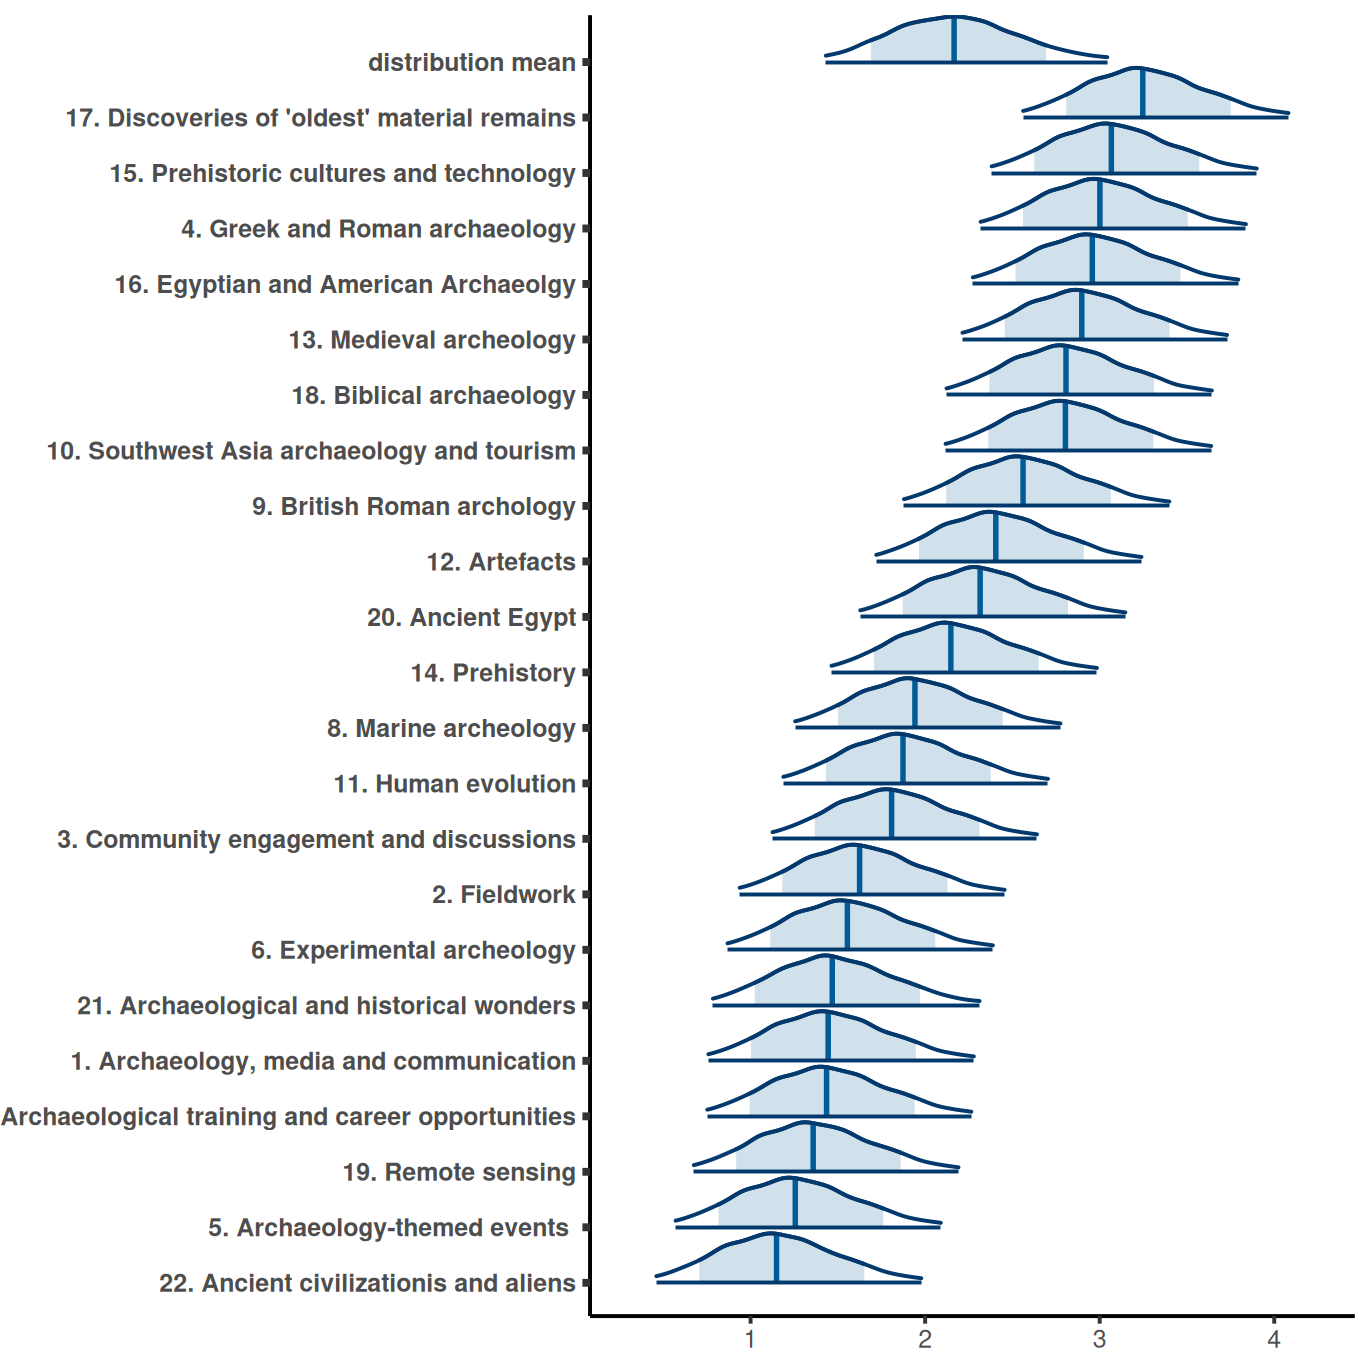

In [45]:
#png(path2posteriorInt,width = 15, height = 15,res=300,unit="cm") 

options(repr.plot.width=6.85,repr.plot.height=6.85,repr.plot.res=200)
mcmc_areas(posterior,par=c("alpha_bar",rownames(df)),prob_outer = 0.95,prob=0.8)+
scale_y_discrete(labels=rev(c("distribution mean",paste(df$X,df$Consolidated,sep=". "))),limits=rev)
#dev.off()

### User intercepts

In [37]:
tab<-precis(m,depth=2,pars="alpha_user")

In [38]:
labels<-read.csv(here("outputs","TopicModels","users","Topics - Users.csv")) # Load topic labels

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/home/sm1mkr/Documents/GitHub/TwitterArchaeology/outputs/TopicModels/users/Topics - Users.csv'”


In [39]:
labels

Topics,Label..Chiara.,Label..Marta.,Label..Alberto.,Consolidated
<int>,<chr>,<lgl>,<chr>,<chr>
1,News and cultural heritage professional,NA,News and cultural heritage professional,News and cultural heritage professional
2,Academic archaeologist/historian,NA,Academic archaeologist/historian,Academic archaeologist/historian
3,Other identities (professional and personal),NA,Amateur archaeologist - creative professions,Hobbies and creative professions
4,Motivation and goal pursuit,NA,Life pespectives / insights,Perspectives on life/the world


In [40]:
table<-cbind(labels[,colnames(labels)%in%c("Consolidated","Topics")],tab)
df2<- table[order(table$mean,decreasing=TRUE),]

In [41]:
df2

,Topics,Consolidated,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
alpha_user[2],2,Academic archaeologist/historian,0.5381452,0.3531400,-0.03094663,1.02819320,422.9984,1.011191
alpha_user[4],4,Perspectives on life/the world,0.1238929,0.3532042,-0.44524190,0.61443264,423.1100,1.011160
alpha_user[1],1,News and cultural heritage professional,-0.3987025,0.3531434,-0.96796119,0.09286428,422.8811,1.011180
alpha_user[3],3,Hobbies and creative professions,-0.6905600,0.3531606,-1.26000990,-0.20038559,423.1798,1.011191


In [46]:
write.csv(df2,here("outputs","BayesianModels",paste("users_intercepts",mname,".csv",sep="")))

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


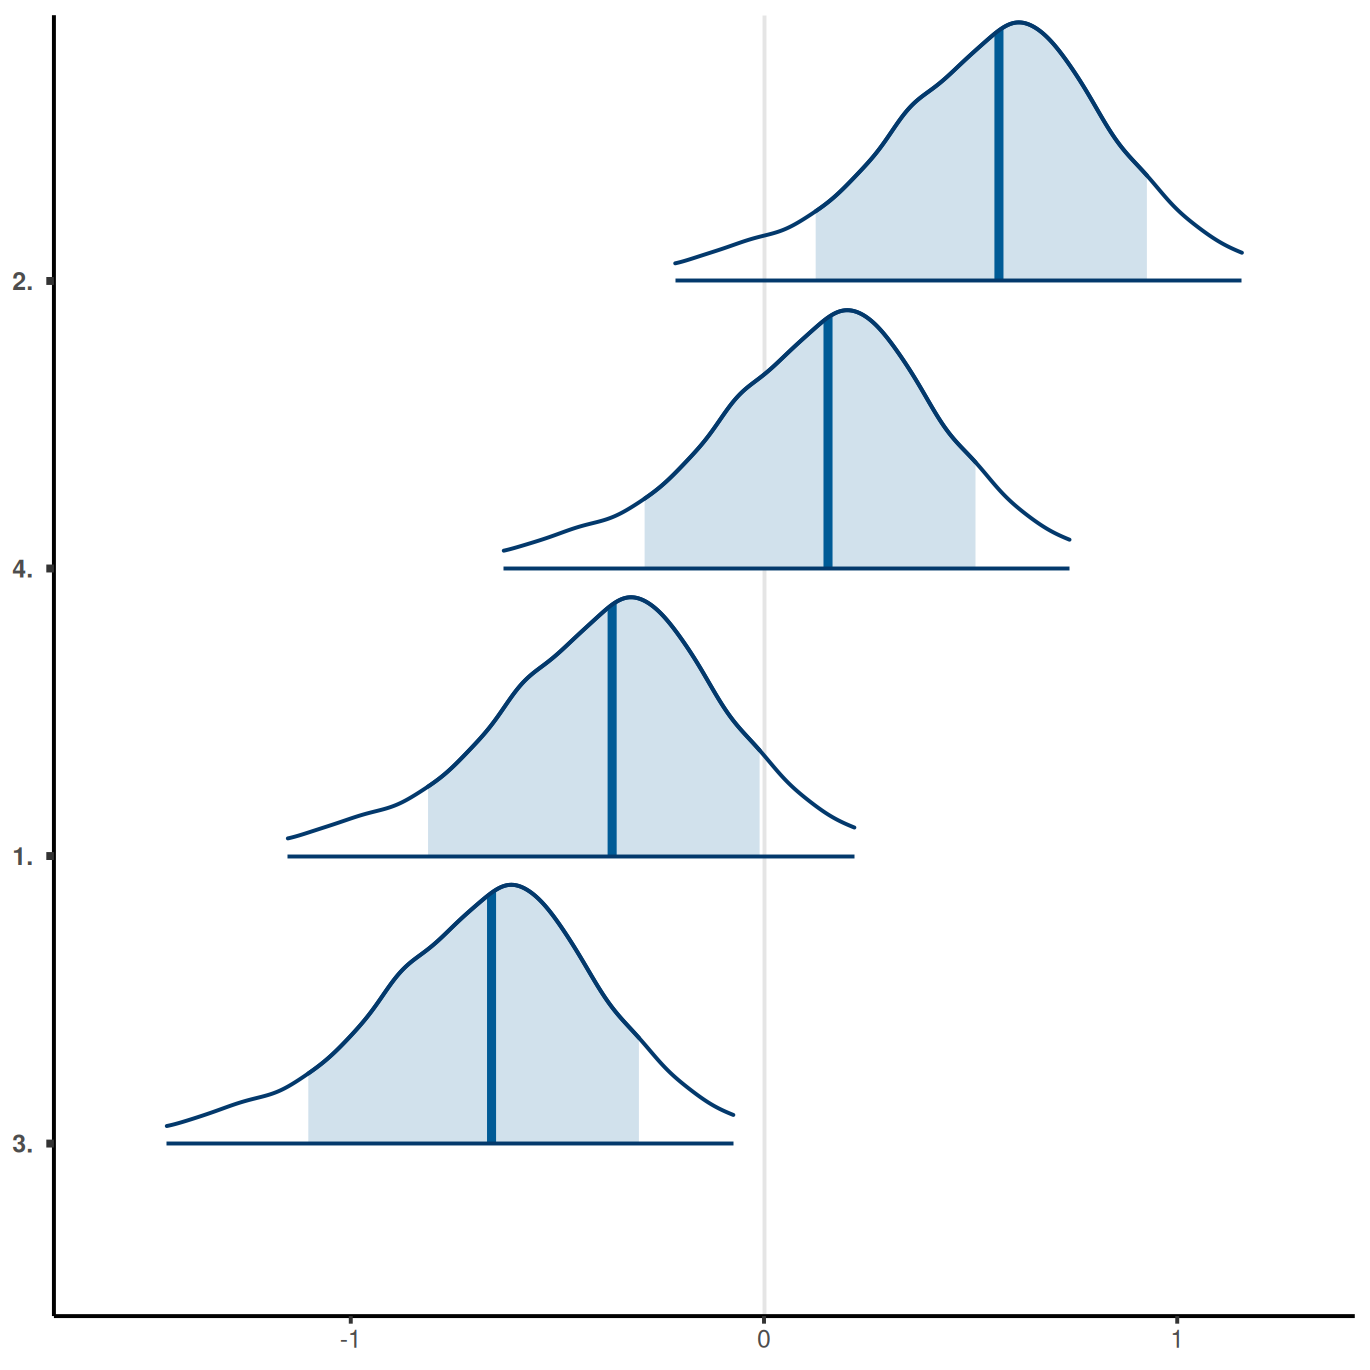

In [49]:
#png(path2posteriorIntUsers,width = 15, height = 15,res=300,unit="cm") 

options(repr.plot.width=6.85,repr.plot.height=6.85,repr.plot.res=200)
mcmc_areas(posterior,par=c(paste("alpha_user[",df2$Topics,"]",sep="")),prob_outer = 0.95,prob=0.8)+
scale_y_discrete(labels=rev(paste(df2$Topics,df2$Label..Chiara,sep=". ")),limits=rev)

#dev.off()

### Other intercepts

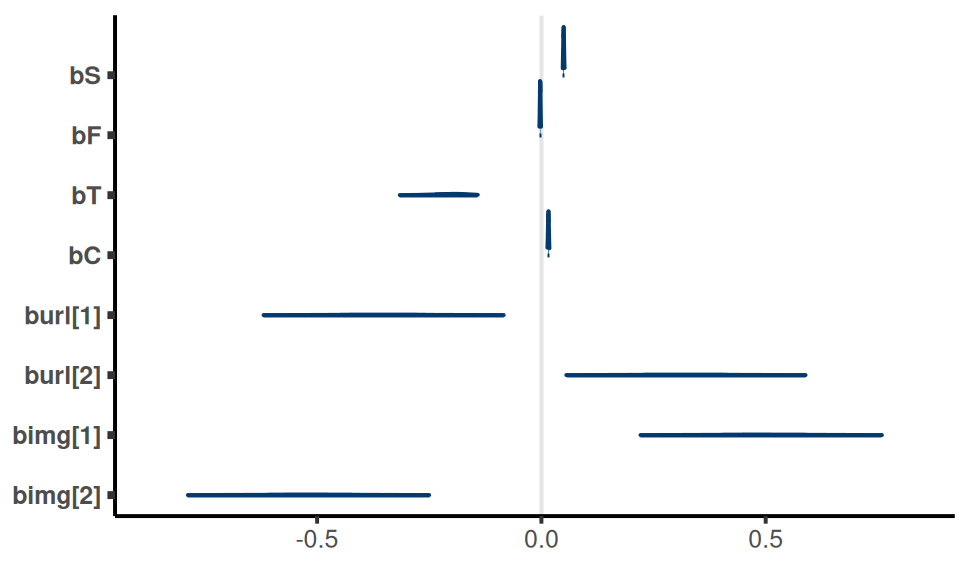

In [52]:
#png(path2posterior,width = 15, height = 7,res=300,unit="cm") 
options(repr.plot.width=4.85,repr.plot.height=2.85,repr.plot.res=200)
mcmc_areas(posterior,par=c("bS","bF","bT","bC","burl[1]","burl[2]","bimg[1]","bimg[2]"),prob_outer = 0.95, prob=0.5)

#dev.off()